In [1]:
import PIL
import time
import torch
import torchvision
import torch.nn.functional as F
from einops import rearrange
from torch import nn
import torch.nn.init as init
from ViTResNet18 import *
from common import *
from TinyImageNet import TinyImageNet

In [2]:
PATH_TO_IMAGE_NET = "./data/tiny-imagenet-200"
BATCH_SIZE_TRAIN = 100
BATCH_SIZE_VAL = 100
device = torch.device("cuda")

transform_train = torchvision.transforms.Compose(
     [torchvision.transforms.RandomHorizontalFlip(),
     torchvision.transforms.RandomRotation(10, resample=PIL.Image.BILINEAR),
     torchvision.transforms.RandomAffine(8, translate=(.15,.15)),
     torchvision.transforms.ToTensor(),
     torchvision.transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))])


transform_val = torchvision.transforms.Compose([
     torchvision.transforms.ToTensor(),
     torchvision.transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))])

train_dataset = TinyImageNet(PATH_TO_IMAGE_NET, split='train', transform=transform_train, in_memory=False)
val_dataset = TinyImageNet(PATH_TO_IMAGE_NET, split='val', transform=transform_val, in_memory=False)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE_TRAIN, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=BATCH_SIZE_VAL, shuffle=False)

C:\Users\dmele\AppData\Local\Programs\Python\Python39\lib\site-packages\torchvision\transforms\transforms.py:1200: UserWarning: Argument resample is deprecated and will be removed since v0.10.0. Please, use interpolation instead
  warnings.warn(


In [3]:
for data, target in train_loader:
    print(data.shape)
    break

torch.Size([100, 3, 224, 224])


In [4]:
#model = ViTResNet(BasicBlock, [3, 3, 3], BATCH_SIZE_TRAIN, num_classes=200, num_tokens=16).to(device)



In [5]:
model = model = ViTResNet18(BasicBlock, [2, 2, 2], BATCH_SIZE_TRAIN, num_classes=200, num_tokens=16).to(device)
EPOCHS = 90
check_on_dataset(model, train_loader, val_loader, EPOCHS, "TinyImageNet", "ViTResNet18")

Epoch: 1
[    0/100000 (  0%)]  Loss: 5.6626
[10000/100000 ( 10%)]  Loss: 5.0558
[20000/100000 ( 20%)]  Loss: 4.8235
[30000/100000 ( 30%)]  Loss: 4.8324
[40000/100000 ( 40%)]  Loss: 4.4328
[50000/100000 ( 50%)]  Loss: 4.2809
[60000/100000 ( 60%)]  Loss: 4.5074
[70000/100000 ( 70%)]  Loss: 4.0710
[80000/100000 ( 80%)]  Loss: 4.2769
[90000/100000 ( 90%)]  Loss: 3.9505
Execution time: 555.25 seconds
Epoch: 2
[    0/100000 (  0%)]  Loss: 4.1567
[10000/100000 ( 10%)]  Loss: 3.9130
[20000/100000 ( 20%)]  Loss: 3.7141
[30000/100000 ( 30%)]  Loss: 3.8912
[40000/100000 ( 40%)]  Loss: 3.9545
[50000/100000 ( 50%)]  Loss: 3.7700
[60000/100000 ( 60%)]  Loss: 3.6610
[70000/100000 ( 70%)]  Loss: 3.6488
[80000/100000 ( 80%)]  Loss: 3.6265
[90000/100000 ( 90%)]  Loss: 3.4177
Execution time: 499.67 seconds
Epoch: 3
[    0/100000 (  0%)]  Loss: 3.3343
[10000/100000 ( 10%)]  Loss: 3.5991
[20000/100000 ( 20%)]  Loss: 3.3908
[30000/100000 ( 30%)]  Loss: 3.4597
[40000/100000 ( 40%)]  Loss: 3.4217
[50000/1000

TypeError: object of type 'NoneType' has no len()

In [11]:
from thop import profile
for data, target in val_loader:
    flops, params = profile(model, inputs=(data.to(device), ))
    print(data.shape)
    print(flops)
    print(params)
    break

'''
torch.Size([100, 3, 224, 224])
281496985600.0
3558664.0
'''
'''
torch.Size([100, 3, 224, 224])
140748492800.0
3558664.0
'''

[INFO] Register count_convNd() for <class 'torch.nn.modules.conv.Conv2d'>.
[INFO] Register count_bn() for <class 'torch.nn.modules.batchnorm.BatchNorm2d'>.
[INFO] Register zero_ops() for <class 'torch.nn.modules.activation.ReLU'>.
[INFO] Register zero_ops() for <class 'torch.nn.modules.pooling.MaxPool2d'>.
[WARN] Cannot find rule for <class 'ViTResNet18.BasicBlock'>. Treat it as zero Macs and zero Params.
[WARN] Cannot find rule for <class 'torch.nn.modules.container.Sequential'>. Treat it as zero Macs and zero Params.
[INFO] Register zero_ops() for <class 'torch.nn.modules.dropout.Dropout'>.
[WARN] Cannot find rule for <class 'torch.nn.modules.normalization.LayerNorm'>. Treat it as zero Macs and zero Params.
[INFO] Register count_linear() for <class 'torch.nn.modules.linear.Linear'>.
[WARN] Cannot find rule for <class 'ViTResNet18.Attention'>. Treat it as zero Macs and zero Params.
[WARN] Cannot find rule for <class 'ViTResNet18.LayerNormalize'>. Treat it as zero Macs and zero Params.

'\ntorch.Size([100, 3, 224, 224])\n140748492800.0\n3558664.0\n'

In [13]:
EPOCHS = 90
model = torch.hub.load('pytorch/vision:v0.9.0', 'resnet18', pretrained=False).to(device)
check_on_dataset(model, train_loader, val_loader, EPOCHS, "TinyImageNet", "ResNet18")

00 ( 80%)]  Loss: 0.2157
[90000/100000 ( 90%)]  Loss: 0.2415
Execution time: 254.99 seconds
Epoch: 43
[    0/100000 (  0%)]  Loss: 0.1572
[10000/100000 ( 10%)]  Loss: 0.1767
[20000/100000 ( 20%)]  Loss: 0.1476
[30000/100000 ( 30%)]  Loss: 0.2351
[40000/100000 ( 40%)]  Loss: 0.1377
[50000/100000 ( 50%)]  Loss: 0.2156
[60000/100000 ( 60%)]  Loss: 0.2013
[70000/100000 ( 70%)]  Loss: 0.2694
[80000/100000 ( 80%)]  Loss: 0.3944
[90000/100000 ( 90%)]  Loss: 0.2411
Execution time: 255.83 seconds
Epoch: 44
[    0/100000 (  0%)]  Loss: 0.2108
[10000/100000 ( 10%)]  Loss: 0.1073
[20000/100000 ( 20%)]  Loss: 0.2098
[30000/100000 ( 30%)]  Loss: 0.1640
[40000/100000 ( 40%)]  Loss: 0.1834
[50000/100000 ( 50%)]  Loss: 0.2393
[60000/100000 ( 60%)]  Loss: 0.1961
[70000/100000 ( 70%)]  Loss: 0.2591
[80000/100000 ( 80%)]  Loss: 0.2392
[90000/100000 ( 90%)]  Loss: 0.2490
Execution time: 256.13 seconds
Epoch: 45
[    0/100000 (  0%)]  Loss: 0.1223
[10000/100000 ( 10%)]  Loss: 0.1174
[20000/100000 ( 20%)]  L

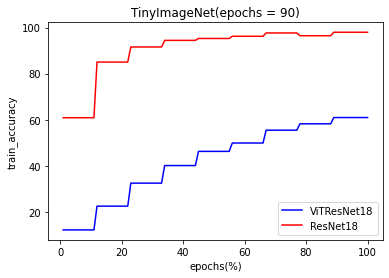

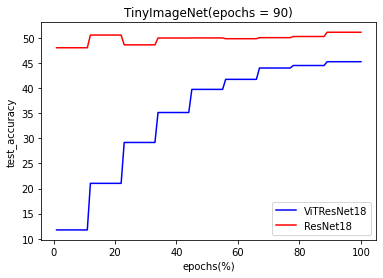

In [14]:
create_graph_comparison("TinyImageNet", "ViTResNet18", "ResNet18")

torch.Size([100, 3, 224, 224])


1.389674496

In [15]:
model = ViTResNet18(BasicBlock, [2, 2, 2], BATCH_SIZE_TRAIN, num_classes=200, num_tokens=32).to(device)
EPOCHS = 90
check_on_dataset(model, train_loader, val_loader, EPOCHS, "TinyImageNet", "ViTResNet18(32tokens)")

Epoch: 1
[    0/100000 (  0%)]  Loss: 7.3055
[10000/100000 ( 10%)]  Loss: 5.6851
[20000/100000 ( 20%)]  Loss: 5.4727
[30000/100000 ( 30%)]  Loss: 5.4408
[40000/100000 ( 40%)]  Loss: 5.3361
[50000/100000 ( 50%)]  Loss: 5.3040
[60000/100000 ( 60%)]  Loss: 5.3098
[70000/100000 ( 70%)]  Loss: 5.3798
[80000/100000 ( 80%)]  Loss: 5.1417
[90000/100000 ( 90%)]  Loss: 5.2070
Execution time: 266.06 seconds
Epoch: 2
[    0/100000 (  0%)]  Loss: 5.1520
[10000/100000 ( 10%)]  Loss: 5.1349
[20000/100000 ( 20%)]  Loss: 5.0476
[30000/100000 ( 30%)]  Loss: 5.0924
[40000/100000 ( 40%)]  Loss: 5.0858
[50000/100000 ( 50%)]  Loss: 5.0870
[60000/100000 ( 60%)]  Loss: 5.2469
[70000/100000 ( 70%)]  Loss: 5.0987
[80000/100000 ( 80%)]  Loss: 5.0208
[90000/100000 ( 90%)]  Loss: 4.9751
Execution time: 264.91 seconds
Epoch: 3
[    0/100000 (  0%)]  Loss: 5.0028
[10000/100000 ( 10%)]  Loss: 4.9805
[20000/100000 ( 20%)]  Loss: 5.0441
[30000/100000 ( 30%)]  Loss: 4.8182
[40000/100000 ( 40%)]  Loss: 4.9481
[50000/1000

KeyboardInterrupt: 